## Inicialización 

In [1]:
# Importar librerías
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

## Preparación de datos

In [ ]:
# Cargar df
df = pd.read_csv('/datasets/car_data.csv')

In [ ]:
# Checar columnas del df
df.columns

Index(['DateCrawled', 'Price', 'VehicleType', 'RegistrationYear', 'Gearbox',
       'Power', 'Model', 'Mileage', 'RegistrationMonth', 'FuelType', 'Brand',
       'NotRepaired', 'DateCreated', 'NumberOfPictures', 'PostalCode',
       'LastSeen'],
      dtype='object')

In [ ]:
# Renombrar columnas del df
df = df.rename(columns={'DateCrawled': 'date_crawled', 'Price': 'price', 'VehicleType': 'vehicle_type', 'RegistrationYear': 'registration_year', 'Gearbox': 'gearbox', 'Power':'power', 'Model':'model', 'Mileage':'mileage', 'RegistrationMonth':'registration_month', 'FuelType':'fuel_type', 'Brand':'brand', 'NotRepaired':'not_repaired', 'DateCreated':'date_created', 'NumberOfPictures':'number_of_pictures', 'PostalCode':'postal_code', 'LastSeen':'last_seen'})

In [5]:
df.sample(10)

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,mileage,registration_month,fuel_type,brand,not_repaired,date_created,number_of_pictures,postal_code,last_seen
83110,21/03/2016 13:58,5500,wagon,2006,auto,140,passat,150000,12,gasoline,volkswagen,no,21/03/2016 00:00,0,24109,06/04/2016 09:46
99873,20/03/2016 18:55,1700,convertible,2002,auto,54,fortwo,150000,11,petrol,smart,no,20/03/2016 00:00,0,21339,07/04/2016 02:45
20912,20/03/2016 10:39,4800,wagon,2002,manual,150,a4,150000,2,petrol,audi,no,20/03/2016 00:00,0,78464,06/04/2016 06:17
124634,27/03/2016 19:56,2500,wagon,2005,manual,150,octavia,150000,5,petrol,skoda,NaN,27/03/2016 00:00,0,16909,05/04/2016 18:16
178615,29/03/2016 02:57,2490,sedan,2004,auto,131,mondeo,5000,9,gasoline,ford,yes,29/03/2016 00:00,0,28277,05/04/2016 17:46
83602,06/03/2016 16:06,11999,coupe,2005,auto,306,other,150000,3,petrol,mercedes_benz,no,06/03/2016 00:00,0,60489,19/03/2016 22:48
121027,29/03/2016 21:53,1599,bus,2001,manual,122,vito,150000,0,gasoline,mercedes_benz,no,29/03/2016 00:00,0,9131,06/04/2016 09:17
251871,09/03/2016 21:53,2400,wagon,2002,auto,166,NaN,150000,6,petrol,alfa_romeo,no,09/03/2016 00:00,0,63065,21/03/2016 06:45
333792,22/03/2016 19:49,1120,sedan,1999,manual,75,golf,150000,8,petrol,volkswagen,no,22/03/2016 00:00,0,45139,26/03/2016 21:47
242968,29/03/2016 21:49,1199,wagon,1996,manual,136,omega,150000,11,petrol,opel,no,29/03/2016 00:00,0,49124,06/04/2016 08:45


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   date_crawled        354369 non-null  object
 1   price               354369 non-null  int64 
 2   vehicle_type        316879 non-null  object
 3   registration_year   354369 non-null  int64 
 4   gearbox             334536 non-null  object
 5   power               354369 non-null  int64 
 6   model               334664 non-null  object
 7   mileage             354369 non-null  int64 
 8   registration_month  354369 non-null  int64 
 9   fuel_type           321474 non-null  object
 10  brand               354369 non-null  object
 11  not_repaired        283215 non-null  object
 12  date_created        354369 non-null  object
 13  number_of_pictures  354369 non-null  int64 
 14  postal_code         354369 non-null  int64 
 15  last_seen           354369 non-null  object
dtypes:

In [7]:
# Dejando las columnas relevantes para el modelo
df_relevant = df[["price","vehicle_type","registration_year","gearbox","power","model","mileage",
                 "fuel_type","brand","not_repaired"]]
df_relevant.sample(10)

,price,vehicle_type,registration_year,gearbox,power,model,mileage,fuel_type,brand,not_repaired
128374,699,sedan,2002,manual,82,colt,100000,petrol,mitsubishi,no
315002,6950,small,2009,manual,80,polo,70000,petrol,volkswagen,no
258901,4299,sedan,1999,manual,170,golf,150000,petrol,volkswagen,no
136264,4400,sedan,2004,manual,170,3er,150000,petrol,bmw,no
106929,14900,wagon,2011,manual,163,3er,125000,gasoline,bmw,no
169375,7450,bus,2007,manual,136,other,150000,gasoline,citroen,no
62112,580,small,1995,manual,0,micra,150000,petrol,nissan,NaN
189901,5800,sedan,2006,auto,190,e_klasse,150000,gasoline,mercedes_benz,no
167694,4999,sedan,2004,manual,102,octavia,125000,petrol,skoda,no
327148,4799,small,2005,manual,92,swift,100000,petrol,suzuki,no


In [8]:
df_relevant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   price              354369 non-null  int64 
 1   vehicle_type       316879 non-null  object
 2   registration_year  354369 non-null  int64 
 3   gearbox            334536 non-null  object
 4   power              354369 non-null  int64 
 5   model              334664 non-null  object
 6   mileage            354369 non-null  int64 
 7   fuel_type          321474 non-null  object
 8   brand              354369 non-null  object
 9   not_repaired       283215 non-null  object
dtypes: int64(4), object(6)
memory usage: 27.0+ MB


In [ ]:
# Checar valores ausentes
df_relevant.isna().sum()

price                    0
vehicle_type         37490
registration_year        0
gearbox              19833
power                    0
model                19705
mileage                  0
fuel_type            32895
brand                    0
not_repaired         71154
dtype: int64

In [10]:
# ESTOS VALORES AUSENTES SE VAN A LLENAR COMO UNKNOWN, PERO NO SE VAN A CONTEMPLAR PARA EL ML. 
# Porcentajes de valores ausentes
print(37490/354369*100)
print(19833/354369*100)
print(19705/354369*100)
print(32895/354369*100)
print(71154/354369*100)

10.57936783409384
5.596708515699737
5.560587974681758
9.282696849893755
20.079070121822166


In [11]:
# LAS COSAS ILOGICAS COMO PRICE EN 0, REGISTRATION EN 1000/9999, DEBEN ESTUDIARSE MAS Y VER ESAS FILAS EN ESPECIFICO. 
df_relevant.describe()

,price,registration_year,power,mileage
count,354369.000000,354369.000000,354369.000000,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535
std,4514.158514,90.227958,189.850405,37905.341530
min,0.000000,1000.000000,0.000000,5000.000000
25%,1050.000000,1999.000000,69.000000,125000.000000
50%,2700.000000,2003.000000,105.000000,150000.000000
75%,6400.000000,2008.000000,143.000000,150000.000000
max,20000.000000,9999.000000,20000.000000,150000.000000


In [12]:
# Filas donde price = 0
df_relevant[df_relevant['price']==0]

,price,vehicle_type,registration_year,gearbox,power,model,mileage,fuel_type,brand,not_repaired
7,0,sedan,1980,manual,50,other,40000,petrol,volkswagen,no
40,0,NaN,1990,NaN,0,corsa,150000,petrol,opel,NaN
111,0,NaN,2017,manual,0,golf,5000,petrol,volkswagen,NaN
115,0,small,1999,NaN,0,NaN,5000,petrol,volkswagen,NaN
152,0,bus,2004,manual,101,meriva,150000,lpg,opel,yes
...,...,...,...,...,...,...,...,...,...,...
354205,0,NaN,2000,manual,65,corsa,150000,NaN,opel,yes
354238,0,small,2002,manual,60,fiesta,150000,petrol,ford,NaN
354248,0,small,1999,manual,53,swift,150000,petrol,suzuki,NaN
354277,0,small,1999,manual,37,arosa,150000,petrol,seat,yes


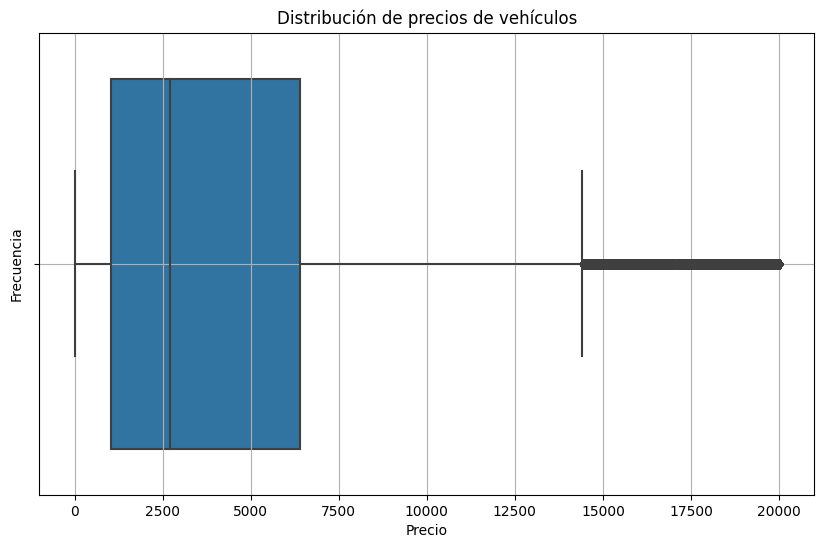

In [13]:
# Distribución de la variable price
plt.figure(figsize=(10, 6))
sns.boxplot(x = df_relevant['price'])  
plt.title('Distribución de precios de vehículos')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

In [14]:
df_relevant['price'].value_counts().sort_index().head(20)

0     10772
1      1189
2        12
3         8
4         1
5        26
7         3
8         9
9         8
10       84
11        5
12        8
13        7
14        5
15       27
16        2
17        5
18        3
19        3
20       51
Name: price, dtype: int64

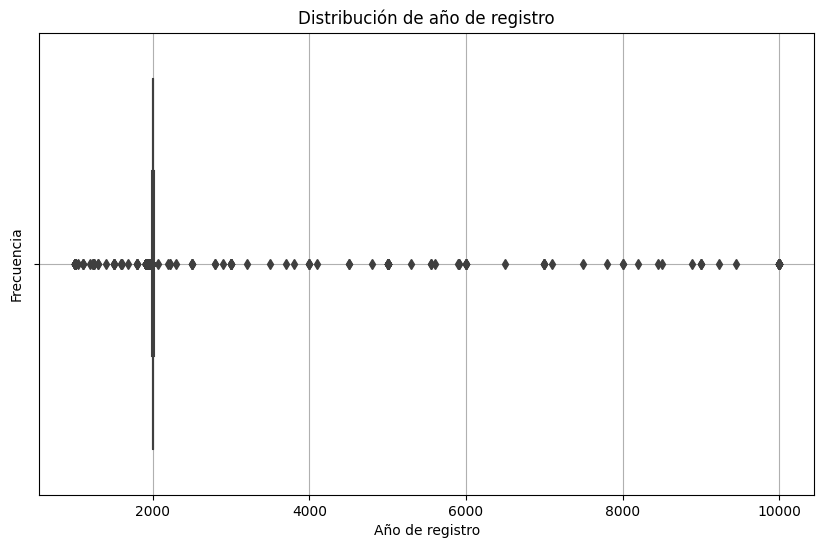

In [15]:
# Distribución de la variable registration_year
plt.figure(figsize=(10, 6))
sns.boxplot(x = df_relevant['registration_year'])  
plt.title('Distribución de año de registro')
plt.xlabel('Año de registro')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

In [ ]:
# Carros más antiguos
df_relevant['registration_year'].value_counts().sort_index().head(40)

1000     37
1001      1
1039      1
1111      3
1200      1
1234      4
1253      1
1255      1
1300      2
1400      1
1500      5
1600      2
1602      1
1688      1
1800      5
1910    101
1915      1
1919      1
1920      1
1923      2
1925      1
1927      1
1928      2
1929      7
1930      3
1931      1
1932      3
1933      3
1934      3
1935      4
1936      3
1937     11
1938      8
1940      2
1941      2
1942      3
1943      4
1944      2
1945      4
1946      1
Name: registration_year, dtype: int64

In [ ]:
# Carros más nuevos
df_relevant['registration_year'].value_counts().sort_index().tail(40)

2018    3959
2019      25
2066       1
2200       1
2222       2
2290       1
2500       4
2800       2
2900       1
3000       7
3200       1
3500       1
3700       1
3800       1
4000       3
4100       1
4500       2
4800       1
5000      17
5300       1
5555       2
5600       1
5900       1
5911       2
6000       5
6500       1
7000       4
7100       1
7500       1
7800       1
8000       2
8200       1
8455       1
8500       1
8888       1
9000       3
9229       1
9450       1
9996       1
9999      26
Name: registration_year, dtype: int64

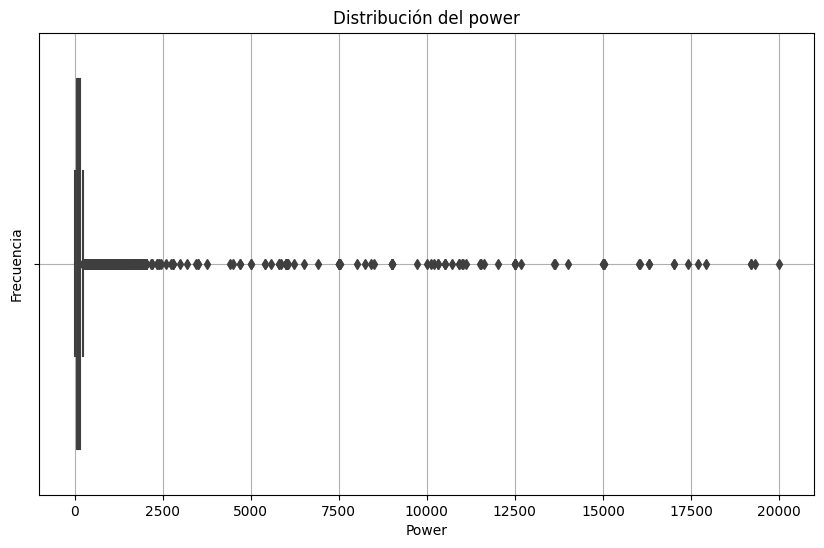

In [18]:
# Distribución de la variable power
plt.figure(figsize=(10, 6))
sns.boxplot(x = df_relevant['power'])  
plt.title('Distribución del power')
plt.xlabel('Power')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

In [19]:
df_relevant['power'].value_counts().sort_index().head(20)

0     40225
1        34
2        10
3         9
4        30
5       103
6        11
7        11
8         7
9         5
10       15
11       28
12       22
13        8
14       20
15       20
16       11
17        8
18       51
19       14
Name: power, dtype: int64

In [20]:
df_relevant['power'].value_counts().sort_index().tail(20)

13636    1
14009    1
15001    1
15016    1
15017    1
15020    1
15033    1
16011    1
16051    1
16311    1
16312    1
17011    1
17019    1
17410    1
17700    1
17932    1
19208    1
19211    1
19312    1
20000    1
Name: power, dtype: int64

In [21]:
# Cálculo de los percentiles columna power
percentiles = np.percentile(df_relevant['power'].dropna(), np.arange(2, 101, 2))
for p, value in zip(range(2, 101, 2), percentiles):
    print(f"Percentil {p}: {value}")

Percentil 2: 0.0
Percentil 4: 0.0
Percentil 6: 0.0
Percentil 8: 0.0
Percentil 10: 0.0
Percentil 12: 43.0
Percentil 14: 50.0
Percentil 16: 54.0
Percentil 18: 60.0
Percentil 20: 60.0
Percentil 22: 60.0
Percentil 24: 66.0
Percentil 26: 70.0
Percentil 28: 75.0
Percentil 30: 75.0
Percentil 32: 75.0
Percentil 34: 77.0
Percentil 36: 82.0
Percentil 38: 88.0
Percentil 40: 90.0
Percentil 42: 94.0
Percentil 44: 101.0
Percentil 46: 101.0
Percentil 48: 102.0
Percentil 50: 105.0
Percentil 52: 105.0
Percentil 54: 109.0
Percentil 56: 110.0
Percentil 58: 116.0
Percentil 60: 116.0
Percentil 62: 120.0
Percentil 64: 122.0
Percentil 66: 125.0
Percentil 68: 131.0
Percentil 70: 136.0
Percentil 72: 140.0
Percentil 74: 140.0
Percentil 76: 143.0
Percentil 78: 150.0
Percentil 80: 150.0
Percentil 82: 156.0
Percentil 84: 163.0
Percentil 86: 170.0
Percentil 88: 174.0
Percentil 90: 179.0
Percentil 92: 193.0
Percentil 94: 204.0
Percentil 96: 224.0
Percentil 98: 258.0
Percentil 100: 20000.0


### Filtrado del DF columna Power ###

Primero se va a filtrar en función de la variable Power (CV), que es la potencia del motor de los carros. Primero, me percaté de que había valores en 0, lo cual no tiene sentido pues el carro debe tener potencia. Después, se imprimieron los valores de los percentiles de 2 en 2 y se determinó lo siguiente: se van a usar los valores del percentil 12 en adelante, que es donde dejan de aparecer carros con potencia 0. También, se van a eliminar los valores de los percentiles 98 en adelante, pues hay un outlier que es un erorr, marca potencia de 20,000 en el percentil 100 a pesar de que el percentil 98 tiene 258 cv, lo cual no tiene sentido. 

In [22]:
# Calcular percentiles 12 y 98
p12 = np.percentile(df_relevant['power'].dropna(), 12)
p98 = np.percentile(df_relevant['power'].dropna(), 98)

# Filtrar el DataFrame usando esos percentiles
df_filtered = df_relevant[(df_relevant['power'] >= p12) & (df_relevant['power'] <= p98)]

# Verificar tamaño original y nuevo
print(f"Tamaño original: {df_relevant.shape}")
print(f"Tamaño filtrado: {df_filtered.shape}")

Tamaño original: (354369, 10)
Tamaño filtrado: (304912, 10)


In [23]:
# Revisión de describe con el nuevo DF
df_filtered.describe()

,price,registration_year,power,mileage
count,304912.000000,304912.000000,304912.000000,304912.000000
mean,4584.190927,2003.551543,116.664179,128654.562628
std,4477.533047,34.276767,45.564315,36622.570560
min,0.000000,1000.000000,43.000000,5000.000000
25%,1200.000000,1999.000000,75.000000,125000.000000
50%,2970.000000,2003.000000,110.000000,150000.000000
75%,6600.000000,2008.000000,144.000000,150000.000000
max,20000.000000,9999.000000,258.000000,150000.000000


### Filtrado del DF columna registration_year ###

In [24]:
# Cálculo de los percentiles columna registration_year
percentiles_year = np.percentile(df_filtered['registration_year'].dropna(), np.arange(2, 101, 2))
for p, value in zip(range(2, 101, 2), percentiles_year):
    print(f"Percentil {p}: {value}")

Percentil 2: 1989.0
Percentil 4: 1992.0
Percentil 6: 1994.0
Percentil 8: 1995.0
Percentil 10: 1996.0
Percentil 12: 1996.0
Percentil 14: 1997.0
Percentil 16: 1997.0
Percentil 18: 1998.0
Percentil 20: 1998.0
Percentil 22: 1999.0
Percentil 24: 1999.0
Percentil 26: 1999.0
Percentil 28: 2000.0
Percentil 30: 2000.0
Percentil 32: 2000.0
Percentil 34: 2000.0
Percentil 36: 2001.0
Percentil 38: 2001.0
Percentil 40: 2002.0
Percentil 42: 2002.0
Percentil 44: 2002.0
Percentil 46: 2003.0
Percentil 48: 2003.0
Percentil 50: 2003.0
Percentil 52: 2004.0
Percentil 54: 2004.0
Percentil 56: 2004.0
Percentil 58: 2005.0
Percentil 60: 2005.0
Percentil 62: 2005.0
Percentil 64: 2006.0
Percentil 66: 2006.0
Percentil 68: 2006.0
Percentil 70: 2007.0
Percentil 72: 2007.0
Percentil 74: 2007.0
Percentil 76: 2008.0
Percentil 78: 2008.0
Percentil 80: 2009.0
Percentil 82: 2009.0
Percentil 84: 2010.0
Percentil 86: 2010.0
Percentil 88: 2011.0
Percentil 90: 2012.0
Percentil 92: 2013.0
Percentil 94: 2014.0
Percentil 96: 201

In [25]:
percentil_1 = np.percentile(df_filtered['registration_year'].dropna(),0.1)
percentil_99 = np.percentile(df_filtered['registration_year'].dropna(),99.9)
print(percentil_1)
print(percentil_99)

1967.0
2018.0


In [ ]:
# Años más antiguos
df_filtered['registration_year'].value_counts().sort_index().head(40)

1000      3
1500      1
1910      7
1930      1
1935      1
1937      2
1941      1
1942      2
1943      3
1945      2
1947      1
1948      1
1949      1
1950      5
1951      7
1952      2
1953      6
1954      6
1955      6
1956      8
1957      5
1958      9
1959     11
1960     32
1961     16
1962     14
1963     28
1964     28
1965     33
1966     60
1967     45
1968     56
1969     67
1970    107
1971    105
1972    139
1973    109
1974    109
1975     92
1976    113
Name: registration_year, dtype: int64

In [ ]:
# Años más recientes
df_filtered['registration_year'].value_counts().sort_index().tail(40)

1992     2603
1993     2937
1994     4163
1995     7466
1996     9338
1997    12771
1998    15467
1999    19719
2000    18908
2001    17805
2002    17021
2003    17631
2004    17492
2005    18393
2006    18031
2007    15576
2008    14104
2009    13674
2010    10254
2011     9484
2012     6905
2013     3971
2014     2397
2015     1061
2016     6640
2017     7589
2018     2908
2019       10
2800        1
2900        1
3500        1
4500        1
5000        5
5911        2
6000        3
6500        1
8000        1
8200        1
9000        1
9999        1
Name: registration_year, dtype: int64

Después de revisar detenidamente los percentiles, valores mínimos y máximos, decidí seleccionar el rango de años de 1950 a 2019. Con esto estoy considerando la eliminación de menos del percentil 1 para el primer valor y más del percentil 99 para el segundo valor. Después del 2019, el siguiente valor es 2800, por eso se eligió el 2019, pues es el último valor factible. Todo esto se hizo obviamente sobre el nuevo DF, después de haberse aplicado el filtro a la columna Power.

In [28]:
# Definir los límites razonables
año_min = 1950
año_max = 2019

# Filtrar el DataFrame con esos límites
df_filtered_2 = df_filtered[(df_filtered['registration_year'] >= año_min) & 
                          (df_filtered['registration_year'] <= año_max)]

# Verificar cuántos datos quedaron
print(f"Tamaño antes del filtrado: {df_filtered.shape}")
print(f"Tamaño después del filtrado por año: {df_filtered_2.shape}")

Tamaño antes del filtrado: (304912, 10)
Tamaño después del filtrado por año: (304867, 10)


In [29]:
# Revisión de describe con el nuevo DF
df_filtered_2.describe()

,price,registration_year,power,mileage
count,304867.000000,304867.000000,304867.000000,304867.000000
mean,4583.943575,2003.331584,116.665743,128667.304103
std,4477.247298,6.807317,45.563687,36604.080145
min,0.000000,1950.000000,43.000000,5000.000000
25%,1200.000000,1999.000000,75.000000,125000.000000
50%,2968.000000,2003.000000,110.000000,150000.000000
75%,6600.000000,2008.000000,144.000000,150000.000000
max,20000.000000,2019.000000,258.000000,150000.000000


### Filtrado del DF columna Price ###

In [30]:
# Cálculo de los percentiles columna registration_year
percentiles_price = np.percentile(df_filtered_2['price'].dropna(), np.arange(2, 101, 2))
for p, value in zip(range(2, 101, 2), percentiles_price):
    print(f"Percentil {p}: {value}")

Percentil 2: 0.0
Percentil 4: 250.0
Percentil 6: 350.0
Percentil 8: 500.0
Percentil 10: 550.0
Percentil 12: 650.0
Percentil 14: 750.0
Percentil 16: 800.0
Percentil 18: 900.0
Percentil 20: 999.0
Percentil 22: 1050.0
Percentil 24: 1200.0
Percentil 26: 1290.0
Percentil 28: 1399.0
Percentil 30: 1500.0
Percentil 32: 1599.0
Percentil 34: 1700.0
Percentil 36: 1850.0
Percentil 38: 1990.0
Percentil 40: 2100.0
Percentil 42: 2290.0
Percentil 44: 2480.0
Percentil 46: 2599.0
Percentil 48: 2800.0
Percentil 50: 2968.0
Percentil 52: 3150.0
Percentil 54: 3400.0
Percentil 56: 3550.0
Percentil 58: 3800.0
Percentil 60: 4000.0
Percentil 62: 4300.0
Percentil 64: 4600.0
Percentil 66: 4950.0
Percentil 68: 5250.0
Percentil 70: 5600.0
Percentil 72: 5999.0
Percentil 74: 6490.0
Percentil 76: 6900.0
Percentil 78: 7299.0
Percentil 80: 7800.0
Percentil 82: 8400.0
Percentil 84: 8950.0
Percentil 86: 9700.0
Percentil 88: 10500.0
Percentil 90: 11500.0
Percentil 92: 12500.0
Percentil 94: 13900.0
Percentil 96: 15400.0
Per

In [31]:
percentil_3_price = np.percentile(df_filtered_2['price'].dropna(),3)
print(percentil_3_price)

150.0


Finalmente, la filtración para la columna Price. Solo se van a considerar mínimos, los máximos pueden ser coches de lujo. Sin embargo, hay mínimos muy bajos, lo cual no es realista, un auto no puede costar 0 euros y es muy poco creíble que cueste menos de 500 euros. Por eso decidí filtrar a partir del percentil 10 en adelante, para tener autos con un precio mínimo de 550 euros.

In [32]:
# Filtrar por precio mínimo razonable
df_filtered_3 = df_filtered_2[df_filtered_2['price'] >= 550] # basado en el percentil 10

# Verificar tamaño final
print(f"Tamaño antes del filtrado: {df_filtered_2.shape}")
print(f"Tamaño después del filtrado por precio: {df_filtered_3.shape}")

Tamaño antes del filtrado: (304867, 10)
Tamaño después del filtrado por precio: (276323, 10)


### Revisión de valores duplicados y ausentes en el df filtrado 3 ###

In [33]:
df_filtered_3.duplicated().sum()

36669

In [34]:
df_filtered_3 = df_filtered_3.drop_duplicates()
df_filtered_3

,price,vehicle_type,registration_year,gearbox,power,model,mileage,fuel_type,brand,not_repaired
1,18300,coupe,2011,manual,190,NaN,125000,gasoline,audi,yes
2,9800,suv,2004,auto,163,grand,125000,gasoline,jeep,NaN
3,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no
4,3600,small,2008,manual,69,fabia,90000,gasoline,skoda,no
5,650,sedan,1995,manual,102,3er,150000,petrol,bmw,yes
...,...,...,...,...,...,...,...,...,...,...
354361,5250,NaN,2016,auto,150,159,150000,NaN,alfa_romeo,no
354362,3200,sedan,2004,manual,225,leon,150000,petrol,seat,yes
354366,1199,convertible,2000,auto,101,fortwo,125000,petrol,smart,no
354367,9200,bus,1996,manual,102,transporter,150000,gasoline,volkswagen,no


In [35]:
df_filtered_3.isna().sum()

price                    0
vehicle_type         16383
registration_year        0
gearbox               4581
power                    0
model                 9488
mileage                  0
fuel_type            15165
brand                    0
not_repaired         35650
dtype: int64

### Análisis exploratorio de datos: variables con valores ausentes ###

Por lógica, tanto el tipo de vehículo como el modelo, influyen en el precio de los autos. Voy a hacer un análisis exploratorio de las otras tres: not_repaired, fuel_type y gearbox, para ver que tanto influyen al precio y si es necesario utilizarlas o no durante el modelo.

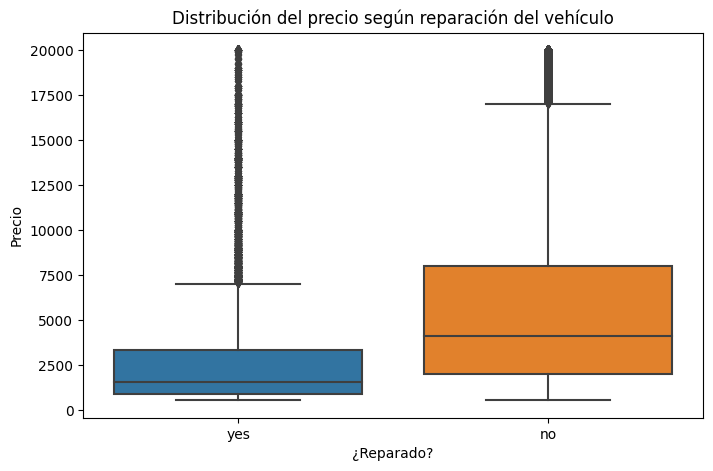

In [36]:
# Analizando a la variable not_repaired
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_filtered_3, x='not_repaired', y='price')
plt.title('Distribución del precio según reparación del vehículo')
plt.xlabel('¿Reparado?')
plt.ylabel('Precio')
plt.show()

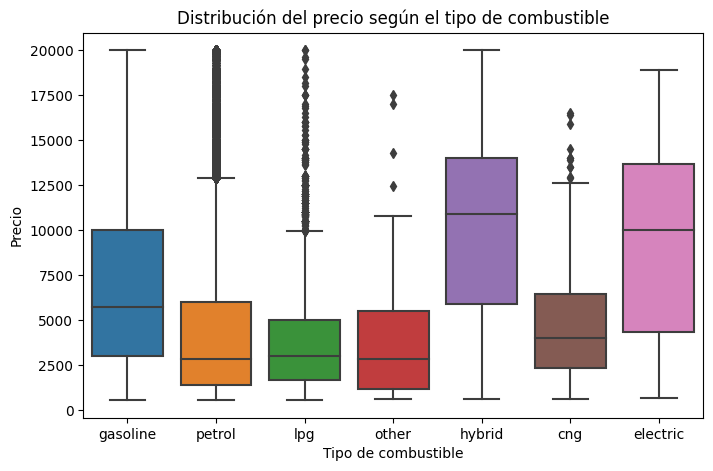

In [37]:
# Analizando a la variable fuel_type
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_filtered_3, x='fuel_type', y='price')
plt.title('Distribución del precio según el tipo de combustible')
plt.xlabel('Tipo de combustible')
plt.ylabel('Precio')
plt.show()

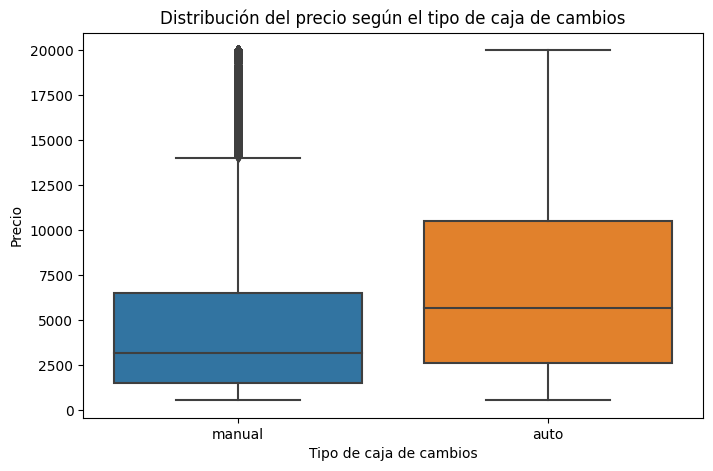

In [38]:
# Analizando a la variable gearbox
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_filtered_3, x='gearbox', y='price')
plt.title('Distribución del precio según el tipo de caja de cambios')
plt.xlabel('Tipo de caja de cambios')
plt.ylabel('Precio')
plt.show()

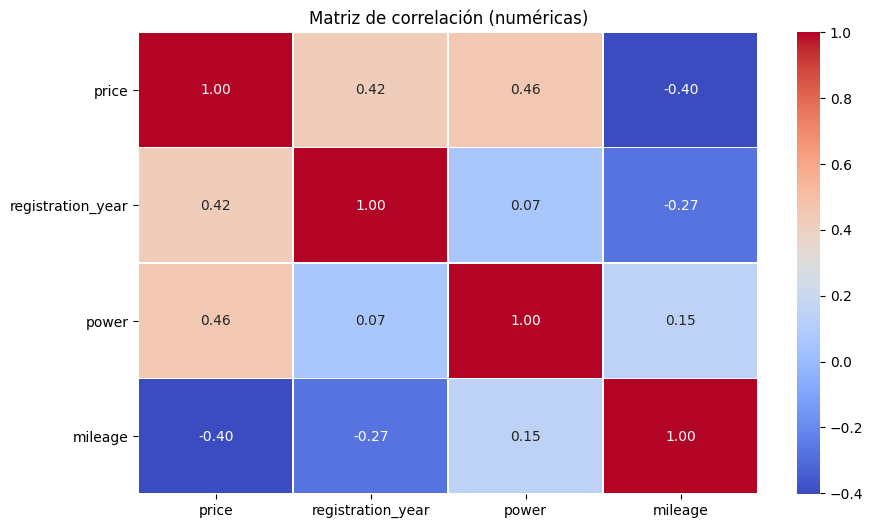

In [39]:
# Matriz de correlación
# Solo columnas numéricas
numerical_df = df_filtered_3.select_dtypes(include=['int64', 'float64'])

# Correlación
correlation_matrix = numerical_df.corr()

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de correlación (numéricas)')
plt.show()

Conclusiones de las variables:
1. Primero se analizaron las variables categóricas con gráficas de caja y bigotes para ver si influyen en el precio de los autos y en las tres se puede ver que efectivamente. Tanto si el carro es reparado o no, como el tipo de combustible y el tipo de caja de cambios tienen un impacto en el precio, por lo que es importante mantener todas estas columnas para el modelo. 
2. Finalmente, en la matriz de correlación, se ve que el año de registro, la potencia y el kilometraje influyen en el precio, estas variables son importantes para el modelo.
3. Decisión: los valores ausentes se van a rellenar con "unknown" como se había establecido previamente, después van a ser ignoradas para el modelo, pues esta categoría "unknown" afectaría al modelo. Finalmente se va a obtener un DF limpio para poder llevar a cabo los modelos.

In [40]:
# 1. Columnas con valores nulos 
cols_to_fill = ['vehicle_type', 'gearbox', 'model', 'fuel_type', 'not_repaired']

# 2. Rellenar nulos con 'unknown'
df_filtered_3[cols_to_fill] = df_filtered_3[cols_to_fill].fillna('unknown')

# 3. Eliminar filas que contengan 'unknown' en cualquiera de esas columnas y revisión del DF final
df_final = df_filtered_3[~df_filtered_3[cols_to_fill].isin(['unknown']).any(axis=1)]
df_final

,price,vehicle_type,registration_year,gearbox,power,model,mileage,fuel_type,brand,not_repaired
3,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no
4,3600,small,2008,manual,69,fabia,90000,gasoline,skoda,no
5,650,sedan,1995,manual,102,3er,150000,petrol,bmw,yes
6,2200,convertible,2004,manual,109,2_reihe,150000,petrol,peugeot,no
10,2000,sedan,2004,manual,105,3_reihe,150000,petrol,mazda,no
...,...,...,...,...,...,...,...,...,...,...
354350,1400,sedan,2001,manual,125,astra,150000,petrol,opel,no
354353,1999,sedan,1997,manual,150,a3,150000,petrol,audi,no
354362,3200,sedan,2004,manual,225,leon,150000,petrol,seat,yes
354366,1199,convertible,2000,auto,101,fortwo,125000,petrol,smart,no


In [41]:
# Verificar si hay nulos o ausentes en el df final
print(df_final.isna().sum())
print(df_final.duplicated().sum())

price                0
vehicle_type         0
registration_year    0
gearbox              0
power                0
model                0
mileage              0
fuel_type            0
brand                0
not_repaired         0
dtype: int64
0


In [42]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183062 entries, 3 to 354367
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   price              183062 non-null  int64 
 1   vehicle_type       183062 non-null  object
 2   registration_year  183062 non-null  int64 
 3   gearbox            183062 non-null  object
 4   power              183062 non-null  int64 
 5   model              183062 non-null  object
 6   mileage            183062 non-null  int64 
 7   fuel_type          183062 non-null  object
 8   brand              183062 non-null  object
 9   not_repaired       183062 non-null  object
dtypes: int64(4), object(6)
memory usage: 15.4+ MB


A pesar de que se eliminaron casi el 50% de los datos respecto al total de registros iniciales, seguimos teniendo muchos datos para el análisis, suficientes para realizar el modelo. En el análisis exploratorio me cercioré de que las columnas que quedaban fueran relevantes antes de eliminar filas, y determiné que sí. Asimismo, todas esas eliminaciones fueron necesarias: no sirve de nada tener valores duplicados o entrenar el modelo con ausentes dentro de las variables categóricas que no pueden deducirse ni mucho menos. Los datos están listos para el modelo.

## Entrenamiento del modelo 

### Preparación ###

In [43]:
# Copia base de tu DataFrame final
df_model = df_final.copy()

# Separar X y y
X = df_model.drop("price", axis=1)
y = df_model["price"]

# Identificar columnas
num_cols = X.select_dtypes(include=["int64", "float64"]).columns
cat_cols = X.select_dtypes(include=["object", "category"]).columns

In [44]:
# Versión 1: DF para modelos que requieren codificación (Regresión lineal, árbol de decisión y Random Forest)

# Codificación one-hot
X_encoded = pd.get_dummies(X, columns=cat_cols, drop_first=True)

# Estandarización
scaler_1 = StandardScaler()
X_encoded[num_cols] = scaler_1.fit_transform(X_encoded[num_cols])

# División
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [45]:
# Versión 2: DF para modelos que no requieren codificación (CatBoost y LightGBM)

# Estandarizar numéricas pero sin tocar categóricas
X_standard = X.copy()
scaler_2 = StandardScaler()
X_standard[num_cols] = scaler_2.fit_transform(X_standard[num_cols])

# División
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_standard, y, test_size=0.2, random_state=42)

In [46]:
print(f"Conjunto codificado: {X_train_1.shape}")
print(f"Conjunto sin codificar: {X_train_2.shape}")

Conjunto codificado: (146449, 303)
Conjunto sin codificar: (146449, 9)


### Entrenamiento de los modelos ###

**Regresión lineal**

In [47]:
lr = LinearRegression()
lr.fit(X_train_1, y_train_1)
predict_lr = lr.predict(X_test_1)

**Bosque aleatorio**

In [48]:
# Obteniendo la mejor combinación de hiperparámetros

# Inicia el cronómetro general
total_start = time.time()

best_rmse = float('inf')
best_model = None

for n in range(70, 101, 10):
    for depth in [10, 15, 20]:
        model = RandomForestRegressor(n_estimators=n, max_depth=depth, random_state=42)

        # Tiempo de entrenamiento
        start_train = time.time()
        model.fit(X_train_1, y_train_1)
        end_train = time.time()
        train_time = end_train - start_train

        # Tiempo de predicción
        start_pred = time.time()
        predictions_valid = model.predict(X_test_1)
        end_pred = time.time()
        pred_time = end_pred - start_pred

        # Cálculo de RMSE
        rmse = np.sqrt(mean_squared_error(y_test_1, predictions_valid))

        print(f"n_estimators={n}, max_depth={depth} | RMSE={rmse:.2f} | "
              f"Train Time={train_time:.2f}s | Predict Time={pred_time:.4f}s")

# Termina el cronómetro general
total_end = time.time()
total_time_ba = total_end - total_start

print(f"\nTiempo total de entrenamiento y evaluación: {total_time_ba:.2f} segundos")

n_estimators=70, max_depth=10 | RMSE=1825.28 | Train Time=61.93s | Predict Time=0.1829s
n_estimators=70, max_depth=15 | RMSE=1621.39 | Train Time=76.95s | Predict Time=0.3721s
n_estimators=70, max_depth=20 | RMSE=1572.85 | Train Time=85.47s | Predict Time=0.5171s
n_estimators=80, max_depth=10 | RMSE=1825.21 | Train Time=71.07s | Predict Time=0.2035s
n_estimators=80, max_depth=15 | RMSE=1620.94 | Train Time=86.21s | Predict Time=0.3746s
n_estimators=80, max_depth=20 | RMSE=1572.29 | Train Time=96.00s | Predict Time=0.5570s
n_estimators=90, max_depth=10 | RMSE=1825.16 | Train Time=79.97s | Predict Time=0.2297s
n_estimators=90, max_depth=15 | RMSE=1620.89 | Train Time=98.02s | Predict Time=0.4049s
n_estimators=90, max_depth=20 | RMSE=1571.90 | Train Time=107.68s | Predict Time=0.6033s
n_estimators=100, max_depth=10 | RMSE=1824.68 | Train Time=87.95s | Predict Time=0.2623s
n_estimators=100, max_depth=15 | RMSE=1620.83 | Train Time=108.89s | Predict Time=0.4405s
n_estimators=100, max_depth=

In [49]:
# Mejor modelo del bosque aleatorio
best_model_rf = RandomForestRegressor(random_state=42, n_estimators=90, max_depth=20)

# Tiempo de entrenamiento 
start_train_rf = time.time()
best_model_rf.fit(X_train_1,y_train_1) 
end_train_rf = time.time()
train_time_rf = end_train_rf - start_train_rf

# Tiempo de predicción
start_pred_rf = time.time()
predict_rf = best_model_rf.predict(X_test_1)
end_pred_rf = time.time()
pred_time_rf = end_pred_rf - start_pred_rf

# Imprimir tiempos
print("El tiempo de entrenamiento es:",train_time_rf)
print("El tiempo de predicción es:",pred_time_rf)

El tiempo de entrenamiento es: 107.27957606315613
El tiempo de predicción es: 0.6446807384490967


Este modelo necesita una gran cantidad de estimadores y depth, pero llega un momento en donde estos empiezan a bajar, llegan al punto en donde el modelo funciona mejor y después empieza a empeorar. Por eso decidí empezar a analizar al modelo en 70 estimators y con depth a partir de 10. De hecho el modelo de árbol de decisión tuvo su mejor desempeño en 16, lo cual esta dentro del rango que escogí para Random Forest. El mejor modelo llega cuando n_estimators = 90 y max_depth = 20. A partir de aquí empeora cuando max_depth = 20.

**Arbol de decisión**

In [50]:
# Inicializar variables para guardar los mejores resultados
best_rmse = np.inf
best_depth = None

# Medir el tiempo total de entrenamiento y predicción
start_total_ad = time.time()

for depth in range(1, 21):  # puedes ajustar el rango si quieres explorar más
    model = DecisionTreeRegressor(random_state=42, max_depth=depth)
    
    start_train = time.time()
    model.fit(X_train_1, y_train_1)
    end_train = time.time()
    
    start_pred = time.time()
    predictions_valid = model.predict(X_test_1)
    end_pred = time.time()
    
    rmse = mean_squared_error(y_test_1, predictions_valid, squared=False)
    
    print(f"max_depth={depth}: RMSE={rmse:.2f}, Training time={end_train - start_train:.3f}s, Prediction time={end_pred - start_pred:.3f}s")
    
    if rmse < best_rmse:
        best_rmse = rmse
        best_depth = depth

end_total_ad = time.time()
print(f"\nMejor max_depth={best_depth} con RMSE={best_rmse:.2f}")
print(f"Tiempo total de entrenamiento y predicción: {end_total_ad - start_total_ad:.2f} segundos")

max_depth=1: RMSE=3579.75, Training time=0.229s, Prediction time=0.020s
max_depth=2: RMSE=3122.77, Training time=0.363s, Prediction time=0.020s
max_depth=3: RMSE=2725.34, Training time=0.538s, Prediction time=0.019s
max_depth=4: RMSE=2477.72, Training time=0.708s, Prediction time=0.020s
max_depth=5: RMSE=2323.45, Training time=0.925s, Prediction time=0.021s
max_depth=6: RMSE=2206.65, Training time=0.987s, Prediction time=0.021s
max_depth=7: RMSE=2110.59, Training time=1.103s, Prediction time=0.021s
max_depth=8: RMSE=2028.91, Training time=1.208s, Prediction time=0.021s
max_depth=9: RMSE=1972.23, Training time=1.357s, Prediction time=0.023s
max_depth=10: RMSE=1920.09, Training time=1.441s, Prediction time=0.022s
max_depth=11: RMSE=1876.46, Training time=1.462s, Prediction time=0.022s
max_depth=12: RMSE=1850.76, Training time=1.533s, Prediction time=0.023s
max_depth=13: RMSE=1822.16, Training time=1.605s, Prediction time=0.023s
max_depth=14: RMSE=1788.42, Training time=1.650s, Prediction

In [51]:
# Mejor modelo del árbol de decisión 
best_model_ad = DecisionTreeRegressor(random_state=42, max_depth=16)

# Tiempo de entrenamiento 
start_train_ad = time.time()
best_model_ad.fit(X_train_1,y_train_1) 
end_train_ad = time.time()
train_time_ad = end_train_ad - start_train_ad

# Tiempo de predicción
start_pred_ad = time.time()
predict_ad = best_model_ad.predict(X_test_1)
end_pred_ad = time.time()
pred_time_ad = end_pred_ad - start_pred_ad

# Imprimir tiempos
print("El tiempo de entrenamiento es:",train_time_ad)
print("El tiempo de predicción es:",pred_time_ad)

El tiempo de entrenamiento es: 1.8608558177947998
El tiempo de predicción es: 0.02613377571105957


**Potenciación de la gradiente**

**CatBoost**

In [52]:
cat_features = X_train_2.select_dtypes(include='object').columns.tolist()

# Definir listas de hiperparámetros que vamos a probar
depths = [4, 6, 8]
learning_rates = [0.03, 0.1, 0.2]

best_rmse = float('inf')
best_model = None
best_params = None

start_total_cb = time.time()

for depth in depths:
    for lr in learning_rates:
        model = CatBoostRegressor(
            iterations=500,
            learning_rate=lr,
            depth=depth,
            random_state=42,
            verbose=0
        )
        
        start_train = time.time()
        model.fit(X_train_2, y_train_2, cat_features=cat_features)
        end_train = time.time()
        
        start_pred = time.time()
        predictions_valid = model.predict(X_test_2)
        end_pred = time.time()
        
        rmse = mean_squared_error(y_test_2, predictions_valid, squared=False)
        
        print(f"depth={depth}, learning_rate={lr}: RMSE={rmse:.2f}, "
              f"Tiempo entrenamiento: {end_train - start_train:.2f} s, "
              f"Tiempo predicción: {end_pred - start_pred:.2f} s")
        
        if rmse < best_rmse:
            best_rmse = rmse
            best_model = model
            best_params = (depth, lr)

print(f"\nMejor modelo CatBoost: depth={best_params[0]}, learning_rate={best_params[1]}, RMSE={best_rmse:.2f}")

end_total_cb = time.time()
print(f"Tiempo total de búsqueda: {end_total_cb - start_total_cb:.2f} segundos")

depth=4, learning_rate=0.03: RMSE=1687.46, Tiempo entrenamiento: 27.46 s, Tiempo predicción: 0.05 s
depth=4, learning_rate=0.1: RMSE=1596.74, Tiempo entrenamiento: 26.86 s, Tiempo predicción: 0.06 s
depth=4, learning_rate=0.2: RMSE=1568.21, Tiempo entrenamiento: 27.13 s, Tiempo predicción: 0.08 s
depth=6, learning_rate=0.03: RMSE=1614.97, Tiempo entrenamiento: 42.55 s, Tiempo predicción: 0.08 s
depth=6, learning_rate=0.1: RMSE=1550.21, Tiempo entrenamiento: 40.63 s, Tiempo predicción: 0.08 s
depth=6, learning_rate=0.2: RMSE=1533.66, Tiempo entrenamiento: 41.30 s, Tiempo predicción: 0.11 s
depth=8, learning_rate=0.03: RMSE=1569.09, Tiempo entrenamiento: 57.93 s, Tiempo predicción: 0.08 s
depth=8, learning_rate=0.1: RMSE=1520.90, Tiempo entrenamiento: 57.13 s, Tiempo predicción: 0.12 s
depth=8, learning_rate=0.2: RMSE=1512.17, Tiempo entrenamiento: 57.58 s, Tiempo predicción: 0.15 s

Mejor modelo CatBoost: depth=8, learning_rate=0.2, RMSE=1512.17
Tiempo total de búsqueda: 379.39 segundos

In [53]:
cat_features = X_train_2.select_dtypes(include='object').columns.tolist()

# Mejor modelo de CatBoost
best_model_cb = CatBoostRegressor(
                iterations=500,
                learning_rate=0.2,
                depth=8,
                random_state=42,
                verbose=0
                )

# Tiempo de entrenamiento 
start_train_cb = time.time()
best_model_cb.fit(X_train_2,y_train_2,cat_features=cat_features) 
end_train_cb = time.time()
train_time_cb = end_train_cb - start_train_cb

# Tiempo de predicción
start_pred_cb = time.time()
predict_cb = best_model_cb.predict(X_test_2)
end_pred_cb = time.time()
pred_time_cb = end_pred_cb - start_pred_cb

# Imprimir tiempos
print("El tiempo de entrenamiento es:",train_time_cb)
print("El tiempo de predicción es:",pred_time_cb)

El tiempo de entrenamiento es: 57.05286240577698
El tiempo de predicción es: 0.14827823638916016


**LightGBM**

In [54]:
for col in X_train_2.select_dtypes(include='object').columns:
    X_train_2.loc[:, col] = X_train_2.loc[:,col].astype('category')
    X_test_2.loc[:, col] = X_test_2.loc[:,col].astype('category')

/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [55]:
# Definir listas de hiperparámetros que vamos a probar
depths = [4, 6, 8]
learning_rates = [0.03, 0.1, 0.2]

best_rmse = float('inf')
best_model = None
best_params = None

start_total_lgb = time.time()

for depth in depths:
    for lr in learning_rates:
        model = LGBMRegressor(
            n_estimators=500,
            learning_rate=lr,
            max_depth=depth,
            random_state=42,
            verbose=-1
        )
        
        start_train = time.time()
        model.fit(X_train_2, y_train_2)
        end_train = time.time()
        
        start_pred = time.time()
        predictions_valid = model.predict(X_test_2)
        end_pred = time.time()
        
        rmse = mean_squared_error(y_test_2, predictions_valid, squared=False)
        
        print(f"depth={depth}, learning_rate={lr}: RMSE={rmse:.2f}, "
              f"Tiempo entrenamiento: {end_train - start_train:.2f} s, "
              f"Tiempo predicción: {end_pred - start_pred:.2f} s")
        
        if rmse < best_rmse:
            best_rmse = rmse
            best_model = model
            best_params = (depth, lr)

print(f"\nMejor modelo LGMRegressor: depth={best_params[0]}, learning_rate={best_params[1]}, RMSE={best_rmse:.2f}")

end_total_lgb = time.time()
print(f"Tiempo total de búsqueda: {end_total_lgb - start_total_lgb:.2f} segundos")

depth=4, learning_rate=0.03: RMSE=1560.77, Tiempo entrenamiento: 5.63 s, Tiempo predicción: 1.30 s
depth=4, learning_rate=0.1: RMSE=1520.94, Tiempo entrenamiento: 5.01 s, Tiempo predicción: 1.29 s
depth=4, learning_rate=0.2: RMSE=1520.04, Tiempo entrenamiento: 4.70 s, Tiempo predicción: 1.22 s
depth=6, learning_rate=0.03: RMSE=1521.66, Tiempo entrenamiento: 7.49 s, Tiempo predicción: 1.91 s
depth=6, learning_rate=0.1: RMSE=1502.96, Tiempo entrenamiento: 6.42 s, Tiempo predicción: 1.70 s
depth=6, learning_rate=0.2: RMSE=1503.62, Tiempo entrenamiento: 5.78 s, Tiempo predicción: 1.60 s
depth=8, learning_rate=0.03: RMSE=1518.40, Tiempo entrenamiento: 7.50 s, Tiempo predicción: 1.89 s
depth=8, learning_rate=0.1: RMSE=1500.66, Tiempo entrenamiento: 5.91 s, Tiempo predicción: 1.42 s
depth=8, learning_rate=0.2: RMSE=1501.49, Tiempo entrenamiento: 5.57 s, Tiempo predicción: 1.31 s

Mejor modelo LGMRegressor: depth=8, learning_rate=0.1, RMSE=1500.66
Tiempo total de búsqueda: 67.75 segundos


In [56]:
# Mejor modelo de LGBMRegressor
best_model_lgb = LGBMRegressor(
                n_estimators=500,
                learning_rate=0.1,
                max_depth=8,
                random_state=42,
                verbose=-1
                )

# Tiempo de entrenamiento 
start_train_lgb = time.time()
best_model_lgb.fit(X_train_2,y_train_2) 
end_train_lgb = time.time()
train_time_lgb = end_train_lgb - start_train_lgb

# Tiempo de predicción
start_pred_lgb = time.time()
predict_lgb = best_model_lgb.predict(X_test_2)
end_pred_lgb = time.time()
pred_time_lgb = end_pred_lgb - start_pred_lgb

# Imprimir tiempos
print("El tiempo de entrenamiento es:",train_time_lgb)
print("El tiempo de predicción es:",pred_time_lgb)

El tiempo de entrenamiento es: 5.983157157897949
El tiempo de predicción es: 1.3209447860717773


## Análisis del modelo

**Función para mostrar RMSE**

In [57]:
def print_rmse(model_name, y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"{model_name} RMSE: {rmse:.2f}")

In [58]:
print_rmse("Linear Regression", y_test_1, predict_lr)

Linear Regression RMSE: 2468.50


In [59]:
print_rmse("Random Forest Regressor", y_test_1, predict_rf)
print(f"El tiempo total de entrenamiento y predicción cambiando los hiperparámetros es de: {total_time_ba:.2f} segundos")
print("Para el mejor modelo, el tiempo de entrenamiento es de:", train_time_rf, 
      "segundos y el de predicción es de",pred_time_rf,"segundos")

Random Forest Regressor RMSE: 1571.90
El tiempo total de entrenamiento y predicción cambiando los hiperparámetros es de: 1084.70 segundos
Para el mejor modelo, el tiempo de entrenamiento es de: 107.27957606315613 segundos y el de predicción es de 0.6446807384490967 segundos


In [60]:
print_rmse("Decision Tree", y_test_1, predict_ad)
print(f"El tiempo total de entrenamiento y predicción cambiando los hiperparámetros es de: {end_total_ad - start_total_ad:.2f} segundos")
print("Para el mejor modelo, el tiempo de entrenamiento es de:", train_time_ad, 
      "segundos y el de predicción es de",pred_time_ad,"segundos")

Decision Tree RMSE: 1774.88
El tiempo total de entrenamiento y predicción cambiando los hiperparámetros es de: 26.53 segundos
Para el mejor modelo, el tiempo de entrenamiento es de: 1.8608558177947998 segundos y el de predicción es de 0.02613377571105957 segundos


In [61]:
print_rmse("CatBoost", y_test_2, predict_cb)
print(f"El tiempo total de entrenamiento y predicción cambiando los hiperparámetros es de: {end_total_cb - start_total_cb:.2f} segundos")
print("Para el mejor modelo, el tiempo de entrenamiento es de:", train_time_cb, 
      "segundos y el de predicción es de",pred_time_cb,"segundos")

CatBoost RMSE: 1512.17
El tiempo total de entrenamiento y predicción cambiando los hiperparámetros es de: 379.39 segundos
Para el mejor modelo, el tiempo de entrenamiento es de: 57.05286240577698 segundos y el de predicción es de 0.14827823638916016 segundos


In [62]:
print_rmse("LGBMRegressor", y_test_2, predict_lgb)
print(f"El tiempo total de entrenamiento y predicción cambiando los hiperparámetros es de: {end_total_lgb - start_total_lgb:.2f} segundos")
print("Para el mejor modelo, el tiempo de entrenamiento es de:", train_time_lgb, 
      "segundos y el de predicción es de",pred_time_lgb,"segundos")

LGBMRegressor RMSE: 1500.66
El tiempo total de entrenamiento y predicción cambiando los hiperparámetros es de: 67.75 segundos
Para el mejor modelo, el tiempo de entrenamiento es de: 5.983157157897949 segundos y el de predicción es de 1.3209447860717773 segundos


**Conclusiones finales**

El orden de mejor a peor modelo, basado en el RMSE, es:
    
    1. LGBMRegressor
    2. CatBoost
    3. Random Forest Regressor
    4. Arbol de decisión
    5. Regresión Lineal
    
Antes de empezar a analizar los resultados y tiempos, es importante mencionar que durante el cambio de hiperparámetros, se necesitan ciclos for y esto se traduce en varias pruebas del modelo para encontrar la combinación de hiperparámetros que arroje el menor RMSE posible. Esto significa que durante esas pruebas, se invierte también tiempo para encontrar la mejor combinación. Esto es importante para analizar el tiempo de entrenamiento y prueba de los modelos. 

Como era de esperarse, el de regresión lineal es el peor con diferencia. Este modelo, básicamente, se utilizó como prueba de cordura y tampoco es buena para el ajuste de hiperparámetros. Después, tenemos al árbol de decisión, el cual baja significativamente su RMSE, se trata de un modelo muy rápido, pero con un RMSE todavía muy lejos a lo deseado. Despúes tenemos al modelo de Random Forest, el cual mejora significativamente el RMSE, sin embargo, el tiempo que duró para encontrar la combinación perfecta de hiperparámetros fue muy largo. Estamos hablando de más de 15 minutos. Todavía no es lo que buscamos, es  mucho tiempo e incluso no es el modelo con el RMSE más bajo. Siguen los mejores dos modelos, los dos de potenciación de gradiente. El de LGBM tiene un RSME ligeramente más bajo, y además es aproximadamente 5 veces más rápido al momento de encontrar la combinación perfecta de hiperparámetros. 

MEJOR MODELO: LGBMRegressor, tanto en RMSE como en tiempo. 